<a href="https://colab.research.google.com/github/PravalikaJedla77/heart-disease-prediction/blob/main/01_EDA_and_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [13]:
import os

data_path = '/content/drive/MyDrive/heart-disease-prediction/data/'
print("Files in data folder:", os.listdir(data_path))

Files in data folder: ['heart.csv']


In [15]:
import pandas as pd
import numpy as np

# Path to data folder
data_path = '/content/drive/MyDrive/heart-disease-prediction/data/'

# Column names for Cleveland dataset
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load dataset with proper encoding and convert '-9' to NaN
df = pd.read_csv(data_path + 'heart.csv', names=columns, na_values='-9', encoding='ISO-8859-1')

# Remove any completely invalid rows (like those with non-numeric 'age')
df = df[pd.to_numeric(df['age'], errors='coerce').notnull()]
df = df.reset_index(drop=True)

# Fill missing values with median
for col in df.columns:
    if df[col].dtype != 'object':
        df[col].fillna(df[col].median(), inplace=True)

# Quick look at cleaned dataset
print("First 10 rows after cleaning:")
display(df.head(10))

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

First 10 rows after cleaning:


/tmp/ipython-input-2621128015.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:
age          0
sex         10
cp          10
trestbps    10
chol        10
fbs         10
restecg     10
thalach     10
exang       10
oldpeak     10
slope       10
ca          10
thal        10
target      10
dtype: int64


In [16]:
import pandas as pd

# Path to your dataset
data_path = '/content/drive/MyDrive/heart-disease-prediction/data/Heart_disease_cleveland_new.csv'

# Load the CSV
df = pd.read_csv(data_path)

# Display first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


In [17]:
# Dataset info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


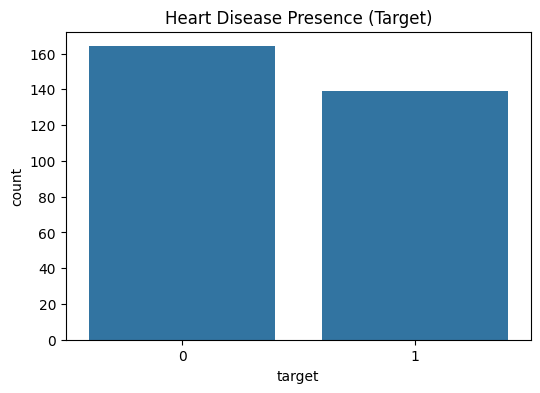

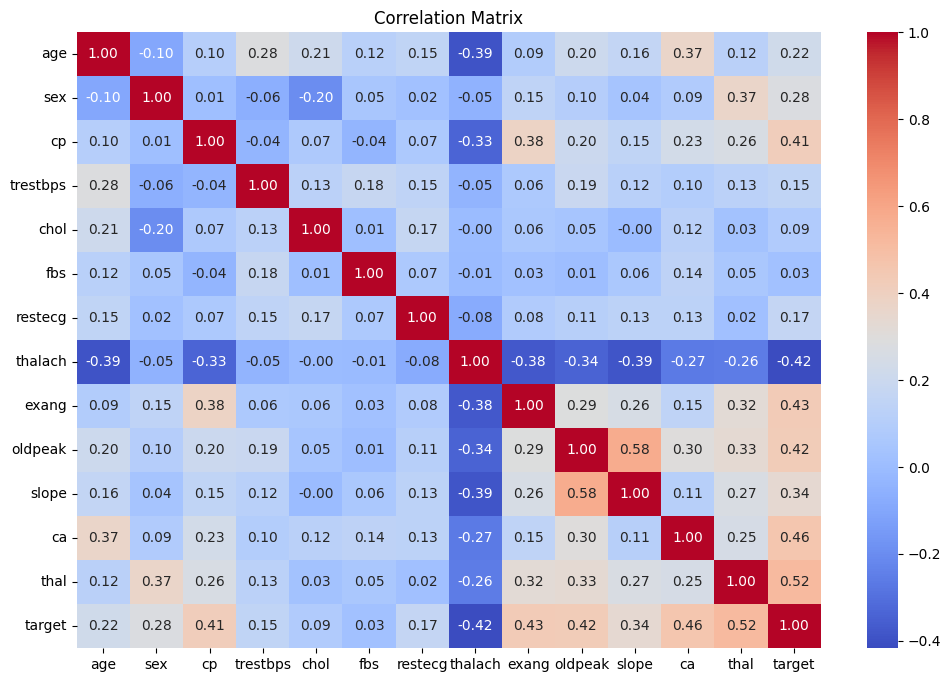

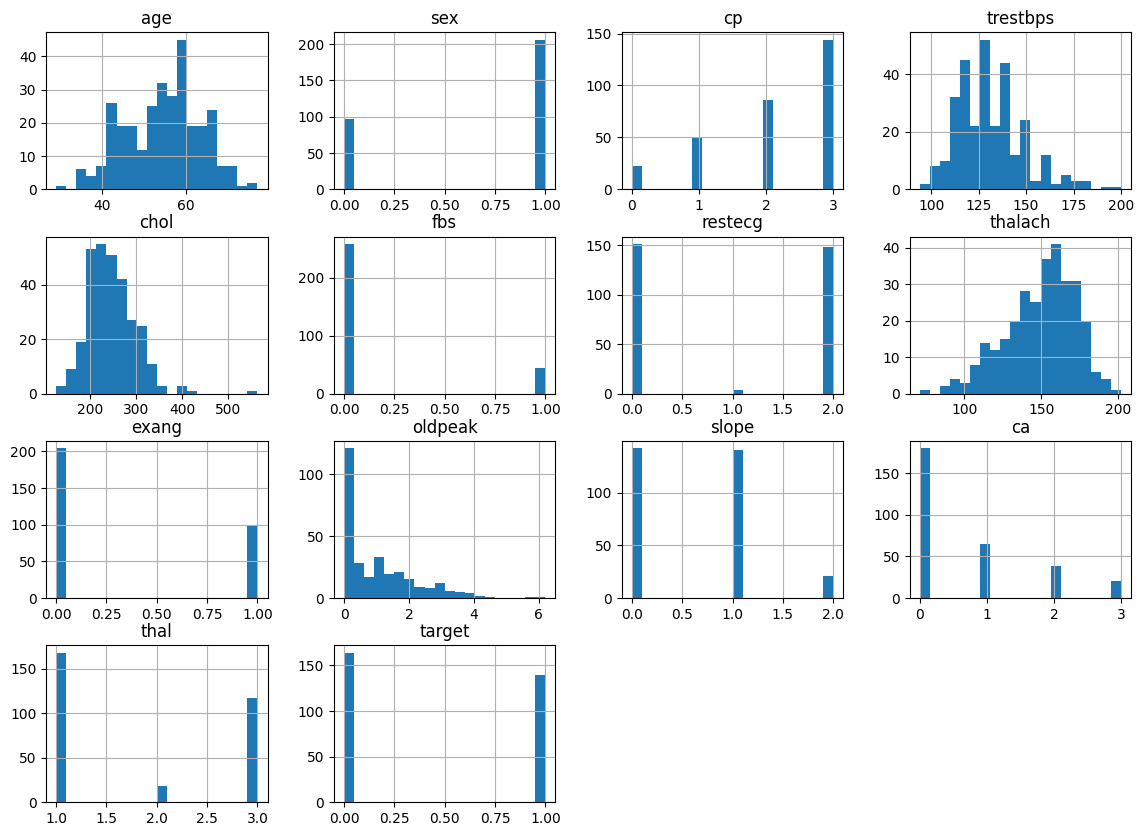

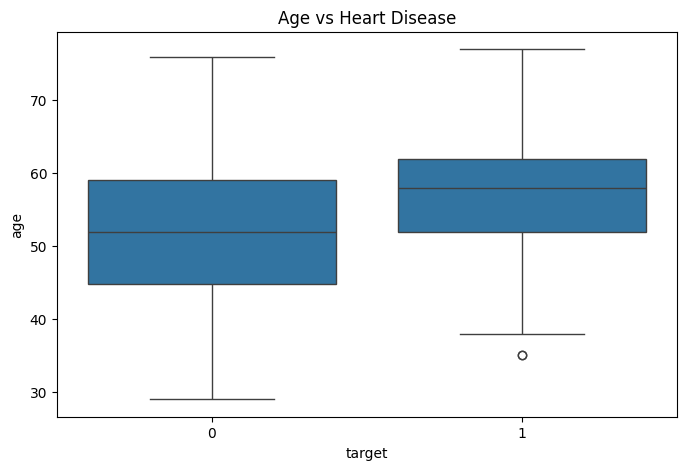

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence (Target)')
plt.show()

# 2️⃣ Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3️⃣ Histograms for numeric features
df.hist(figsize=(14,10), bins=20)
plt.show()

# 4️⃣ Boxplot of age vs target
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Features and target
X = df.drop('target', axis=1)
y = df['target']

# 2️⃣ Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# 5️⃣ Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 6️⃣ Confusion Matrix for best model
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm)

# 7️⃣ Classification Report
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.8852459016393442
Random Forest Accuracy: 0.8688524590163934
Confusion Matrix (Random Forest):
 [[26  3]
 [ 5 27]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [21]:
import os

# Create model folder if it doesn't exist
os.makedirs('/content/drive/MyDrive/heart-disease-prediction/model', exist_ok=True)

In [22]:
import pickle

# Save the Random Forest model
pickle.dump(rf, open('/content/drive/MyDrive/heart-disease-prediction/model/heart_model.pkl','wb'))

# Save the scaler
pickle.dump(scaler, open('/content/drive/MyDrive/heart-disease-prediction/model/scaler.pkl','wb'))

In [25]:
import pickle

# Save Random Forest model
pickle.dump(rf, open('heart_model.pkl','wb'))

# Save StandardScaler
pickle.dump(scaler, open('scaler.pkl','wb'))

In [26]:
import pickle
from google.colab import files

# Save model
pickle.dump(rf, open('heart_model.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

# Download them
files.download('heart_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
from google.colab import files

files.download('heart_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from google.colab import files
files.download('/content/drive/MyDrive/heart-disease-prediction/model/heart_model.pkl')
files.download('/content/drive/MyDrive/heart-disease-prediction/model/scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>